# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
type(cities)
# Converting the list of cities into a DF
city_df = pd.DataFrame({'City':cities})

In [3]:
# Adding columns to populate needed data
city_df["Cloudiness (%)"]=""
city_df["Country"]=""
city_df["Date"]=""
city_df["Humidity (%)"]=""
city_df["Lat"]=""
city_df["Lng"]=""
city_df["Max Temp (F)"]=""
city_df["Wind Speed (mph)"]=""

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API call and loop
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in city_df.iterrows():
    if (index % 50) == 0:
        #Sleep function was at Max's suggestion. Making a pause every 50 calls.
      time.sleep(2)  
    city = row["City"]
    
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&q="
    query_url = url + city + "&APPID=" + api_key
    weather_response = requests.get(query_url).json()
    try:
        city_df.set_value(index, "Cloudiness (%)", weather_response["clouds"]["all"])
        city_df.set_value(index, "Country", weather_response["sys"]["country"])
        city_df.set_value(index, "Date", weather_response["dt"])
        city_df.set_value(index, "Humidity (%)", weather_response["main"]["humidity"])
        city_df.set_value(index, "Lat", weather_response["coord"]["lat"])
        city_df.set_value(index, "Lng", weather_response["coord"]["lon"])
        city_df.set_value(index, "Max Temp (F)", weather_response["main"]["temp_max"])
        city_df.set_value(index, "Wind Speed (mph)", weather_response["wind"]["speed"])
    
        print(f"Processing Record {index+1} | {city}")
    
    except (KeyError, IndexError):
        # this is my workaround since leaving the field blank for cities not found would't let me plot
        # Added note in plot for the bad data point (0,0)
        city_df.set_value(index, "Cloudiness (%)", 0)
        city_df.set_value(index, "Country", 0)
        city_df.set_value(index, "Date", 0)
        city_df.set_value(index, "Humidity (%)", 0)
        city_df.set_value(index, "Lat", 0)
        city_df.set_value(index, "Lng", 0)
        city_df.set_value(index, "Max Temp (F)", 0)
        city_df.set_value(index, "Wind Speed (mph)", 0)
        print("City not found. Skipping...")  

Beginning Data Retrieval
-----------------------------


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .ia

Processing Record 1 | barrow
Processing Record 2 | provideniya
Processing Record 3 | new norfolk
Processing Record 4 | garwa


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

City not found. Skipping...
Processing Record 6 | nanortalik
Processing Record 7 | mataura
Processing Record 8 | nikolskoye
Processing Record 9 | xuddur
Processing Record 10 | puerto ayora
Processing Record 11 | albany
Processing Record 12 | koslan
Processing Record 13 | te anau
Processing Record 14 | santa barbara
City not found. Skipping...
Processing Record 16 | tuktoyaktuk
Processing Record 17 | punta arenas
City not found. Skipping...
Processing Record 19 | vaini
Processing Record 20 | seoul
Processing Record 21 | saint george
Processing Record 22 | cape town
Processing Record 23 | arlit
Processing Record 24 | qaanaaq
City not found. Skipping...
Processing Record 26 | lask
Processing Record 27 | avarua
Processing Record 28 | kodiak
Processing Record 29 | dormidontovka
Processing Record 30 | cockburn town
Processing Record 31 | yellowknife
Processing Record 32 | hermanus
Processing Record 33 | ixtapa
Processing Record 34 | klaksvik
Processing Record 35 | banon
Processing Record 36 

City not found. Skipping...
City not found. Skipping...
Processing Record 261 | ouesso
Processing Record 262 | luebo
Processing Record 263 | kovdor
Processing Record 264 | havoysund
Processing Record 265 | tecoanapa
Processing Record 266 | port lincoln
Processing Record 267 | lorengau
Processing Record 268 | beatrice
Processing Record 269 | lindsay
City not found. Skipping...
Processing Record 271 | bichura
Processing Record 272 | quang ngai
Processing Record 273 | mizdah
Processing Record 274 | salym
City not found. Skipping...
City not found. Skipping...
Processing Record 277 | san cristobal
Processing Record 278 | biak
Processing Record 279 | eyemouth
Processing Record 280 | fare
Processing Record 281 | rosario oeste
Processing Record 282 | sayyan
Processing Record 283 | uyemskiy
City not found. Skipping...
Processing Record 285 | ous
Processing Record 286 | shimoda
Processing Record 287 | crestview
Processing Record 288 | hithadhoo
Processing Record 289 | zorritos
Processing Record

City not found. Skipping...
Processing Record 513 | pozo colorado
City not found. Skipping...
Processing Record 515 | veraval
Processing Record 516 | gorontalo
Processing Record 517 | fort nelson
Processing Record 518 | lahaina
Processing Record 519 | luganville
City not found. Skipping...
Processing Record 521 | ibotirama
Processing Record 522 | nantucket
Processing Record 523 | arzgir
Processing Record 524 | gerash
Processing Record 525 | jacqueville
Processing Record 526 | sept-iles
Processing Record 527 | chapais
Processing Record 528 | diamantino
Processing Record 529 | mirnyy
Processing Record 530 | luau
Processing Record 531 | contepec
Processing Record 532 | mount isa
Processing Record 533 | anadyr
Processing Record 534 | puerto suarez
Processing Record 535 | christchurch
Processing Record 536 | beringovskiy
City not found. Skipping...
Processing Record 538 | saint-pierre
Processing Record 539 | port keats
City not found. Skipping...
Processing Record 541 | porto belo
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df.count()

City                609
Cloudiness (%)      609
Country             609
Date                609
Humidity (%)        609
Lat                 609
Lng                 609
Max Temp (F)        609
Wind Speed (mph)    609
dtype: int64

In [6]:
# Saving the df to csv.
city_df.to_csv("Weather_Data", encoding='utf-8', index=False)
# Displaying DF (note the zeros added for my workaround)
city_df

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,barrow,88,AR,1562904219,83,-38.31,-60.23,47.97,1.32
1,provideniya,20,RU,1562904301,87,64.42,-173.23,55.4,13.42
2,new norfolk,20,AU,1562904253,61,-42.78,147.06,48.2,23.04
3,garwa,100,IN,1562904301,92,27.63,81.51,78.72,4.41
4,barentsburg,0,0,0,0,0,0,0,0
5,nanortalik,100,GL,1562904257,95,60.14,-45.24,38.87,2.08
6,mataura,100,NZ,1562904302,89,-46.19,168.86,48.99,5.1
7,nikolskoye,75,RU,1562904275,81,59.7,30.79,52,6.71
8,xuddur,100,SO,1562904302,88,4.12,43.89,70.22,13.69
9,puerto ayora,0,EC,1562904302,93,-0.74,-90.35,71.01,4


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

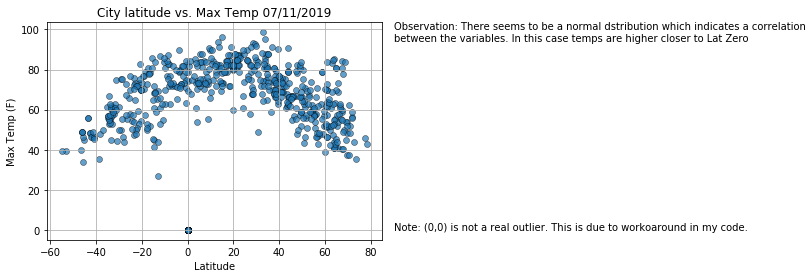

<Figure size 432x288 with 0 Axes>

In [15]:
# Settings for plot
x = city_df["Lat"].values.tolist()
y = city_df["Max Temp (F)"].values.tolist()


plt.scatter(x,y,edgecolor = 'black', linewidths=0.5,alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City latitude vs. Max Temp 07/11/2019")
plt.text(90,100,"Observation: There seems to be a normal dstribution which indicates a correlation")
plt.text(90,94,"between the variables. In this case temps are higher closer to Lat Zero")
plt.text(90,0,"Note: (0,0) is not a real outlier. This is due to workoaround in my code.")
plt.grid()
plt.show()
plt.savefig("City latitude vs. Temp.jpeg")

#### Latitude vs. Humidity Plot

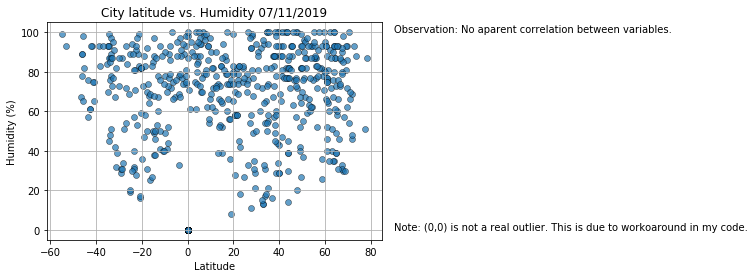

<Figure size 432x288 with 0 Axes>

In [16]:
x = city_df["Lat"].values.tolist()
y = city_df["Humidity (%)"].values.tolist()


plt.scatter(x,y,edgecolor = 'black', linewidths=0.5,alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City latitude vs. Humidity 07/11/2019")
plt.text(90,100,"Observation: No aparent correlation between variables.")
plt.text(90,0,"Note: (0,0) is not a real outlier. This is due to workoaround in my code.")
plt.grid()
plt.show()
plt.savefig("City latitude vs. Humidity.jpeg")

#### Latitude vs. Cloudiness Plot

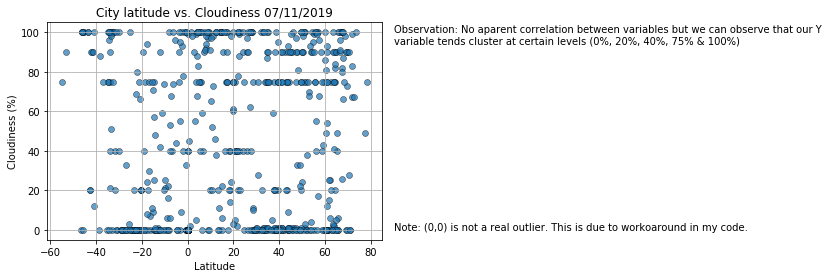

<Figure size 432x288 with 0 Axes>

In [18]:
x = city_df["Lat"].values.tolist()
y = city_df["Cloudiness (%)"].values.tolist()


plt.scatter(x,y,edgecolor = 'black', linewidths=0.5,alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City latitude vs. Cloudiness 07/11/2019")
plt.text(90,100,"Observation: No aparent correlation between variables but we can observe that our Y")
plt.text(90,94,"variable tends cluster at certain levels (0%, 20%, 40%, 75% & 100%)")
plt.text(90,0,"Note: (0,0) is not a real outlier. This is due to workoaround in my code.")
plt.grid()
plt.show()
plt.savefig("City latitude vs. Clouds.jpeg")

#### Latitude vs. Wind Speed Plot

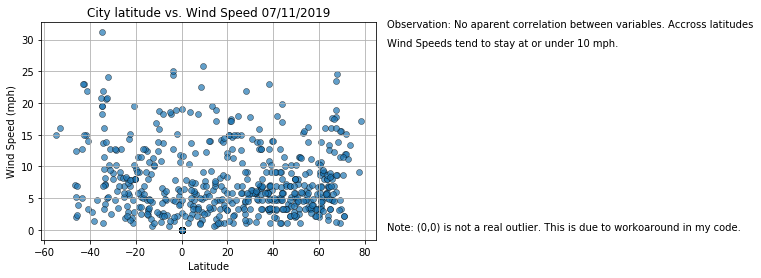

<Figure size 432x288 with 0 Axes>

In [22]:
x = city_df["Lat"].values.tolist()
y = city_df["Wind Speed (mph)"].values.tolist()


plt.scatter(x,y,edgecolor = 'black', linewidths=0.5,alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City latitude vs. Wind Speed 07/11/2019")
plt.text(90,32,"Observation: No aparent correlation between variables. Accross latitudes")
plt.text(90,29,"Wind Speeds tend to stay at or under 10 mph.")
plt.text(90,0,"Note: (0,0) is not a real outlier. This is due to workoaround in my code.")
plt.grid()
plt.show()
plt.savefig("City latitude vs. Wind Speed.jpeg")